# Import Dependencies

In [72]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField, MarkovTransitionField
from pyts.datasets import load_gunpoint
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.utils import resample
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks, NearMiss
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset,TensorDataset

from matplotlib import colors
from IPython import display
import os
from torch.utils.data.dataset import Dataset
from matplotlib.pyplot import imread
import glob
import os
import random
from sklearn.preprocessing import LabelEncoder

from torchvision.models import alexnet, vgg16, resnet152, resnet18, vgg19

%matplotlib inline

from torch.distributions.utils import lazy_property
import math
import h5py
from PIL import Image


import torch.nn.functional as nnf
from torch.utils.data import random_split
from torch.optim import SGD 
from torch.distributions import constraints
import torchvision as torchv
import torchvision.transforms as torchvt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
# !pip install numba==0.53


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 41.0 kB/s eta 0:00:00m eta 0:00:010:00:03m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 53.0 kB/s eta 0:00:00m eta 0:00:010:00:13
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
You should consider upgrading via the '/home/madan/anaconda3/bin/python -m pip install --upgrade pip' command.


# Load datasets

In [4]:
df_hb_train = pd.read_csv('dataset/mitbih_train.csv',header = None)
df_hb_test = pd.read_csv('dataset/mitbih_test.csv', header = None)

In [5]:
df_hb_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Seperate Independent(X) and dependent variable(y)

In [6]:
X = df_hb_train.iloc[:,:187]

In [7]:
y = df_hb_train.iloc[:,187]

In [8]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 187, dtype: float64

## We have seperatly test data. For now we are holding test data and split from training

In [10]:
df_hb_test.shape

(21892, 188)

## Train test split

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=42,stratify=y)

In [12]:
np.unique(y_train)

array([0., 1., 2., 3., 4.])

In [13]:
y_train.value_counts()

0.0    65223
4.0     5788
2.0     5209
1.0     2001
3.0      577
Name: 187, dtype: int64

In [14]:
y_test.value_counts()

0.0    7248
4.0     643
2.0     579
1.0     222
3.0      64
Name: 187, dtype: int64

In [15]:
df_hb_train[df_hb_train[187] == 3]

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
80482,1.000000,0.899749,0.641604,0.314536,0.101504,0.107769,0.111529,0.071429,0.063910,0.058897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80483,0.732252,1.000000,0.983773,0.484787,0.178499,0.111562,0.081136,0.050710,0.046653,0.046653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80484,0.991984,1.000000,0.601202,0.280561,0.158317,0.146293,0.104208,0.090180,0.080160,0.070140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80485,0.778378,0.528378,0.258108,0.128378,0.000000,0.037838,0.167568,0.235135,0.227027,0.222973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80486,1.000000,0.914931,0.531250,0.303819,0.178819,0.157986,0.128472,0.126736,0.118056,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81118,0.771529,1.000000,0.776801,0.316344,0.165202,0.124780,0.117750,0.108963,0.084359,0.091388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81119,0.590000,0.373333,0.283333,0.303333,0.340000,0.263333,0.136667,0.120000,0.090000,0.110000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81120,1.000000,0.939286,0.553571,0.285714,0.166071,0.141071,0.112500,0.108929,0.094643,0.096429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81121,1.000000,0.964981,0.778210,0.513619,0.214008,0.090791,0.112840,0.097276,0.075227,0.070039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [16]:
df_hb_train[df_hb_train[187] == 3].shape

(641, 188)

In [17]:
df_hb_train.shape

(87554, 188)

In [18]:
df_hb_test.shape

(21892, 188)

In [19]:
df_hb_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_hb_train.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87553,0.901506,0.845886,0.800695,0.748552,0.687138,0.599073,0.512167,0.427578,0.395133,0.402086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [21]:
# # omit last column as y
# x_train = df_hb_train.iloc[:,:187]
# x_test = df_hb_test.iloc[:,:187]

## GramianAngularField (to convert timeseries into image)

In [22]:
# For exploratory purpose only
gasf = GramianAngularField(image_size=187, method='summation')


In [23]:
help(gasf)

Help on GramianAngularField in module pyts.image.gaf object:

class GramianAngularField(sklearn.base.BaseEstimator, pyts.base.UnivariateTransformerMixin)
 |  GramianAngularField(image_size=1.0, sample_range=(-1, 1), method='summation', overlapping=False, flatten=False)
 |  
 |  Gramian Angular Field.
 |  
 |  Parameters
 |  ----------
 |  image_size : int or float (default = 1.)
 |      Shape of the output images. If float, it represents a percentage
 |      of the size of each time series and must be between 0 and 1. Output
 |      images are square, thus providing the size of one dimension is enough.
 |  
 |  sample_range : None or tuple (min, max) (default = (-1, 1))
 |      Desired range of transformed data. If None, no scaling is performed
 |      and all the values of the input data must be between -1 and 1.
 |      If tuple, each sample is scaled between min and max; min must be
 |      greater than or equal to -1 and max must be lower than or equal to 1.
 |  
 |  method : 'summ

In [27]:
x_train.shape

(78798, 187)

In [28]:
# y_train = df_hb_train[187].values.astype(int)
# y_test = df_hb_test[187].values.astype(int)

In [29]:
x_train = x_train[:25000] 

In [30]:
x_train.shape

(25000, 187)

In [31]:
x_gasf_train = gasf.fit_transform(x_train)

In [32]:
x_gasf_train[0]

array([[ 1.        ,  0.13818181, -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.13818181, -0.96181158, -0.13818181, ..., -0.13818181,
        -0.13818181, -0.13818181],
       [-1.        , -0.13818181,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [-1.        , -0.13818181,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-1.        , -0.13818181,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-1.        , -0.13818181,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [33]:
x_gasf_train.shape

(25000, 187, 187)

**Note: ** (78798: rows, 187: columns) > (78798: rows, 187: each data point rows / image width, 187: each data point columns/ image height)

In [34]:
x_gasf_test = gasf.transform(x_test)

In [35]:
x_gasf_train[4000]

array([[ 1.        , -0.04347825, -0.01976287, ..., -1.        ,
        -1.        , -1.        ],
       [-0.04347825, -0.99621928, -0.998     , ...,  0.04347825,
         0.04347825,  0.04347825],
       [-0.01976287, -0.998     , -0.99921886, ...,  0.01976287,
         0.01976287,  0.01976287],
       ...,
       [-1.        ,  0.04347825,  0.01976287, ...,  1.        ,
         1.        ,  1.        ],
       [-1.        ,  0.04347825,  0.01976287, ...,  1.        ,
         1.        ,  1.        ],
       [-1.        ,  0.04347825,  0.01976287, ...,  1.        ,
         1.        ,  1.        ]])

In [36]:
x_train.values[4000, :].shape

(187,)

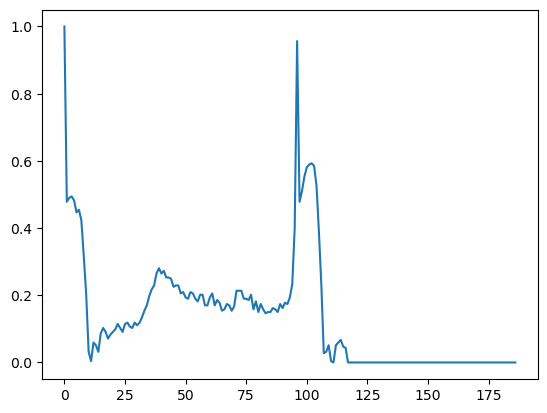

In [37]:
# Plot 1 heartbeat
x_train.values[4000, :]
plt.plot(np.arange(187), x_train.values[4000, :])

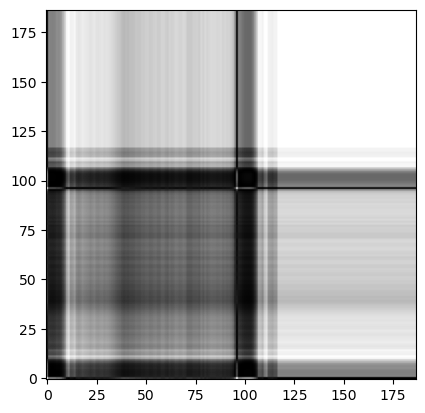

In [38]:
# GAF for 1 heartbeat
plt.imshow(x_gasf_train[4000], cmap='gray', origin='lower')

In [39]:
x_gasf_train[4000].shape

(187, 187)

In [40]:
x_gasf_train.shape

(25000, 187, 187)

In [41]:
#plt.imshow(x_gasf_test[21891], cmap='gray', origin='lower')

In [73]:
np.unique(y_train)

array([0., 1., 2., 3., 4.])

In [74]:
np.unique(y_train)

array([0., 1., 2., 3., 4.])

In [75]:
x_train.shape

(25000, 187)

In [76]:
y_train.shape

(25000,)

In [51]:
y_train = y_train[:25000]

C:\Users\pcity\AppData\Local\Temp\ipykernel_18632\1290694309.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y_train[:25000]


In [52]:
np.unique(y_train)

array([0., 1., 2., 3., 4.])

In [53]:
# upsampling to reduce class imbalance
smt2 = SMOTE(sampling_strategy={1: 30000, 2: 20000, 3: 20000, 4: 10000}, n_jobs=-1, random_state=42)
x_train_2, y_train_2 = smt2.fit_resample(x_train, y_train)


C:\Users\pcity\anaconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (30000) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 20678)
  warnings.warn(


In [54]:
x_train_2, y_train_2 = x_train, y_train

In [55]:
x_train.shape

(25000, 187)

In [56]:
x_train_2.shape

(25000, 187)

In [57]:
gasf = GramianAngularField(image_size=150, method='summation')
x_gasf_train_2 = gasf.fit_transform(x_train_2)
x_gasf_test_2 = gasf.transform(x_test)

In [58]:
# create placeholders, then populate with images
#summation GAF
with h5py.File('hb_data_mit_bih_balanced_2.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_gasf_train_2), 224, 224), np.float32)  # 224, 224 for resnet
    hdf5_file.create_dataset("y_train", (len(y_train_2),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_gasf_test_2), 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((224, 224))])
    
    for i, (x, y) in enumerate(zip(x_gasf_train_2, y_train_2)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_train"][i, ...] = t
        hdf5_file["y_train"][i] = y

    for i, (x, y) in enumerate(zip(x_gasf_test_2, y_test)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_test"][i, ...] = t
        hdf5_file["y_test"][i] = y

In [60]:
# # upsampling to try with GramianAngularField method='difference'
# # results are almost same for both
# # smt3 = SMOTE(sampling_strategy={1: 30000, 2: 20000, 3: 20000, 4: 10000}, n_jobs=-1, random_state=42)
# # x_train_3, y_train_3 = smt3.fit_resample(x_train, y_train)
# x_train_3, y_train_3 = x_train, y_train

# gasf = GramianAngularField(image_size=150, method='difference')
# x_gasf_train_3 = gasf.fit_transform(x_train_3)
# x_gasf_test_3 = gasf.transform(x_test)

In [61]:
# with h5py.File('hb_data_mit_bih_balanced_3.hdf5', mode='w') as hdf5_file:
#     hdf5_file.create_dataset("x_train", (len(x_gasf_train_3), 224, 224), np.float32)
#     hdf5_file.create_dataset("y_train", (len(y_train_3),), np.int32)
#     hdf5_file.create_dataset("x_test", (len(x_gasf_test_3), 224, 224), np.float32)
#     hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
#     transform = transforms.Compose([transforms.Resize((224, 224))])
    
#     for i, (x, y) in enumerate(zip(x_gasf_train_3, y_train_3)):
#         image = Image.fromarray(x.astype(float))
#         t = np.array(transform(image))
#         hdf5_file["x_train"][i, ...] = t
#         hdf5_file["y_train"][i] = y

#     for i, (x, y) in enumerate(zip(x_gasf_test_3, y_test)):
#         image = Image.fromarray(x.astype(float))
#         t = np.array(transform(image))
#         hdf5_file["x_test"][i, ...] = t
#         hdf5_file["y_test"][i] = y